In [27]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cnn = Sequential()

In [3]:
## ___ PARAMETERS ___ 
img_width , img_height = 128,128
Batch_size = 32
num_trainable_layers = 0

In [4]:
## DIRECTORIES 

train_data = 'seg_train'
predict_data = 'prediction'
test_data = 'seg_test'

In [5]:
## __ DATA GENERATOR __ 

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [6]:
val_test_datagen =  ImageDataGenerator(preprocessing_function = preprocess_input)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (img_width , img_height),
    batch_size = Batch_size,
    class_mode = 'sparse'
)

Found 14034 images belonging to 6 classes.


In [8]:
test_generator = val_test_datagen.flow_from_directory(
    test_data,
    target_size = (img_width , img_height),
    batch_size = Batch_size,
    class_mode = 'sparse',
    shuffle = 'False'
)

Found 3000 images belonging to 6 classes.


In [9]:
predict_generator = val_test_datagen.flow_from_directory(
    predict_data,
    target_size = (img_width , img_height),
    batch_size = Batch_size,
    class_mode = 'sparse'
)
    

Found 14 images belonging to 3 classes.


In [10]:
print("Prediction data path:", predict_data)

Prediction data path: prediction


In [11]:
import os

print("Train classes:", os.listdir('seg_train'))  # should show subfolders like ['bird', 'drone', 'airplane']
print("Test folder contents:", os.listdir('seg_test'))  # should show something like ['dummy']


Train classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Test folder contents: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [13]:
## __ LOAD and CONFIGURE 

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

base_model.trainable = False

In [14]:
base_model.summary()

Model: "mobilenet_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [15]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64,activation = 'relu'),
    Dense(6,activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,294,854 (12.57 MB)

 Trainable params: 65,990 (257.77 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [16]:
## ___ Compile

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
## __ TRAIN___

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,           
    restore_best_weights=True
)

model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop]
)


C:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 161s 363ms/step - accuracy: 0.8082 - loss: 0.5449 - val_accuracy: 0.9053 - val_loss: 0.2553
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8885 - loss: 0.3088 - val_accuracy: 0.9097 - val_loss: 0.2425
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.8988 - loss: 0.2780 - val_accuracy: 0.9147 - val_loss: 0.2328
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 205ms/step - accuracy: 0.9038 - loss: 0.2605 - val_accuracy: 0.9180 - val_loss: 0.2307
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 201ms/step - accuracy: 0.9068 - loss: 0.2504 - val_accuracy: 0.9177 - val_loss: 0.2259
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 201ms/step - accuracy: 0.9128 - loss: 0.2374 - val_accuracy: 0.9163 - val_loss: 0.2314
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.9206 - loss: 0.2218 - val_accuracy: 0.9093 - val_loss: 0.2392
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 96s 218ms/step - accuracy: 0.9121 - loss: 

In [20]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9303 - loss: 0.2137
Test Accuracy: 0.9213


# Image pridection of whole folder 

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
predict_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

predict_generator = predict_datagen.flow_from_directory(
    'prediction',                 # your prediction folder
    target_size=(128, 128),        # match input size
    batch_size=32,                 # or any number
    class_mode=None,               # no labels since you're predicting
    shuffle=False
)

Found 31 images belonging to 6 classes.


In [23]:
predictions = model.predict(predict_generator)
predicted_class_indices = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


In [24]:
# Get class labels from training generator
labels = train_generator.class_indices
labels = dict((v, k) for k, v in labels.items())  # Reverse mapping

predicted_labels = [labels[i] for i in predicted_class_indices]

In [25]:
filenames = predict_generator.filenames

for i in range(len(filenames)):
    print(f"{filenames[i]} --> Predicted: {predicted_labels[i]}")

building\156.jpg --> Predicted: buildings
building\244.jpg --> Predicted: buildings
building\5.jpg --> Predicted: buildings
building\61.jpg --> Predicted: buildings
forest\149.jpg --> Predicted: forest
forest\152.jpg --> Predicted: forest
forest\64.jpg --> Predicted: forest
forest\88.jpg --> Predicted: forest
forest\99.jpg --> Predicted: forest
glacier\176.jpg --> Predicted: glacier
glacier\344.jpg --> Predicted: glacier
glacier\38.jpg --> Predicted: glacier
glacier\400.jpg --> Predicted: glacier
glacier\498.jpg --> Predicted: glacier
glacier\499.jpg --> Predicted: glacier
mountain\101.jpg --> Predicted: glacier
mountain\119.jpg --> Predicted: mountain
mountain\185.jpg --> Predicted: mountain
mountain\28.jpg --> Predicted: mountain
mountain\30.jpg --> Predicted: glacier
sea\1187.jpg --> Predicted: sea
sea\398.jpg --> Predicted: sea
sea\528.jpg --> Predicted: sea
sea\798.jpg --> Predicted: sea
sea\936.jpg --> Predicted: sea
street\1176.jpg --> Predicted: buildings
street\1427.jpg --> Pr

## __ predicting single image __


In [41]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [37]:
class_labels = list(train_generator.class_indices.keys())

In [38]:
img_path = 'D:/classification 2/seg_pred/284.jpg'  # Path to the image you want to predict

# Load and preprocess
img = load_img(img_path, target_size=(128, 128))  # Resize to match model input
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Use the same preprocessing as training


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


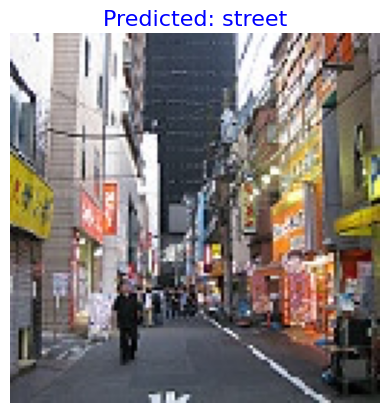

In [40]:
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]


plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}", fontsize=16, color='blue')
plt.show()

In [44]:
# Save model
from keras.saving import save_model
save_model(model, "scene_classifier_model.keras")

# Load model
from tensorflow.keras.models import load_model
model = load_model("scene_classifier_model.h5")

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)